# Merging the Two files


In [3]:
#convert json file into csv for easier merging 
import pandas as pd
import json 

jsonfile = pd.read_json("dim_customer.json")
jsonfile.to_csv("dim_customer.csv")

In [4]:
#merging the two csv files 

import csv 

file1 = pd.read_csv("dim_customer.csv")
file2 = pd.read_csv("fct_invoice.csv")

#rename one column in file1 for easier merging 
file1.rename(columns={"id": "customer_id"}, inplace=True)

#merge file2 and file3 (left join)

df = pd.merge(file1, file2, 
                   on='customer_id', 
                   how='left')

df

,Unnamed: 0,age,first_name,gender,customer_id,last_name,invoice_no,category,quantity,price,payment_method,invoice_date,shopping_mall
0,0,48.0,Nicholas,M,0,Flores,I254078,Shoes,3,1800.51,Cash,28/05/2021,Kanyon
1,0,48.0,Nicholas,M,0,Flores,I387354,Shoes,1,600.17,Cash,7/4/2021,Kanyon
2,0,48.0,Nicholas,M,0,Flores,I170558,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM
3,0,48.0,Nicholas,M,0,Flores,I187874,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul
4,0,48.0,Nicholas,M,0,Flores,I171870,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,5186,NaN,Arthur,M,9428,Harris,I216403,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul
99453,5187,NaN,David,M,9494,Roy,I203211,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity
99454,5188,85.0,Thomas,M,10350,Turner,I325731,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM
99455,5189,NaN,April,F,10587,Sanchez,I478078,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity


# Easy


## 1

In [6]:
#How many unique customers are in the dataset?

df["customer_id"].nunique()

5191

## 2

In [8]:
#What are the different categories of products available?

a = df["category"].unique()
pd.DataFrame(a)

,0
0,Shoes
1,Cosmetics
2,Books
3,Toys
4,Clothing
5,Food & Beverage
6,Technology
7,Souvenir


In [9]:
#How many unique categories are there?

df["category"].nunique()

8

## 3

In [13]:
#Which payment method is the most popular? 

result = df["payment_method"].mode()
pd.DataFrame(result)

,payment_method
0,Cash


In [15]:
#How many times was it used?

df["payment_method"].value_counts().max()

44447

# Medium


## 1

In [16]:
#What are the three most popular categories, by total sales?

pop_categories = df[["category","quantity"]].groupby("category").sum()["quantity"]
new = pop_categories.nlargest(n=3)
pd.DataFrame(new)

,quantity
category,
Clothing,103558
Cosmetics,45465
Food & Beverage,44277


## 2

In [17]:
#What are the total sales attributed to customers over the age of 45?

data = df[["age","quantity"]]

data[
    (df["age"] > 45)
].sum()["quantity"]

97629.0

## 3


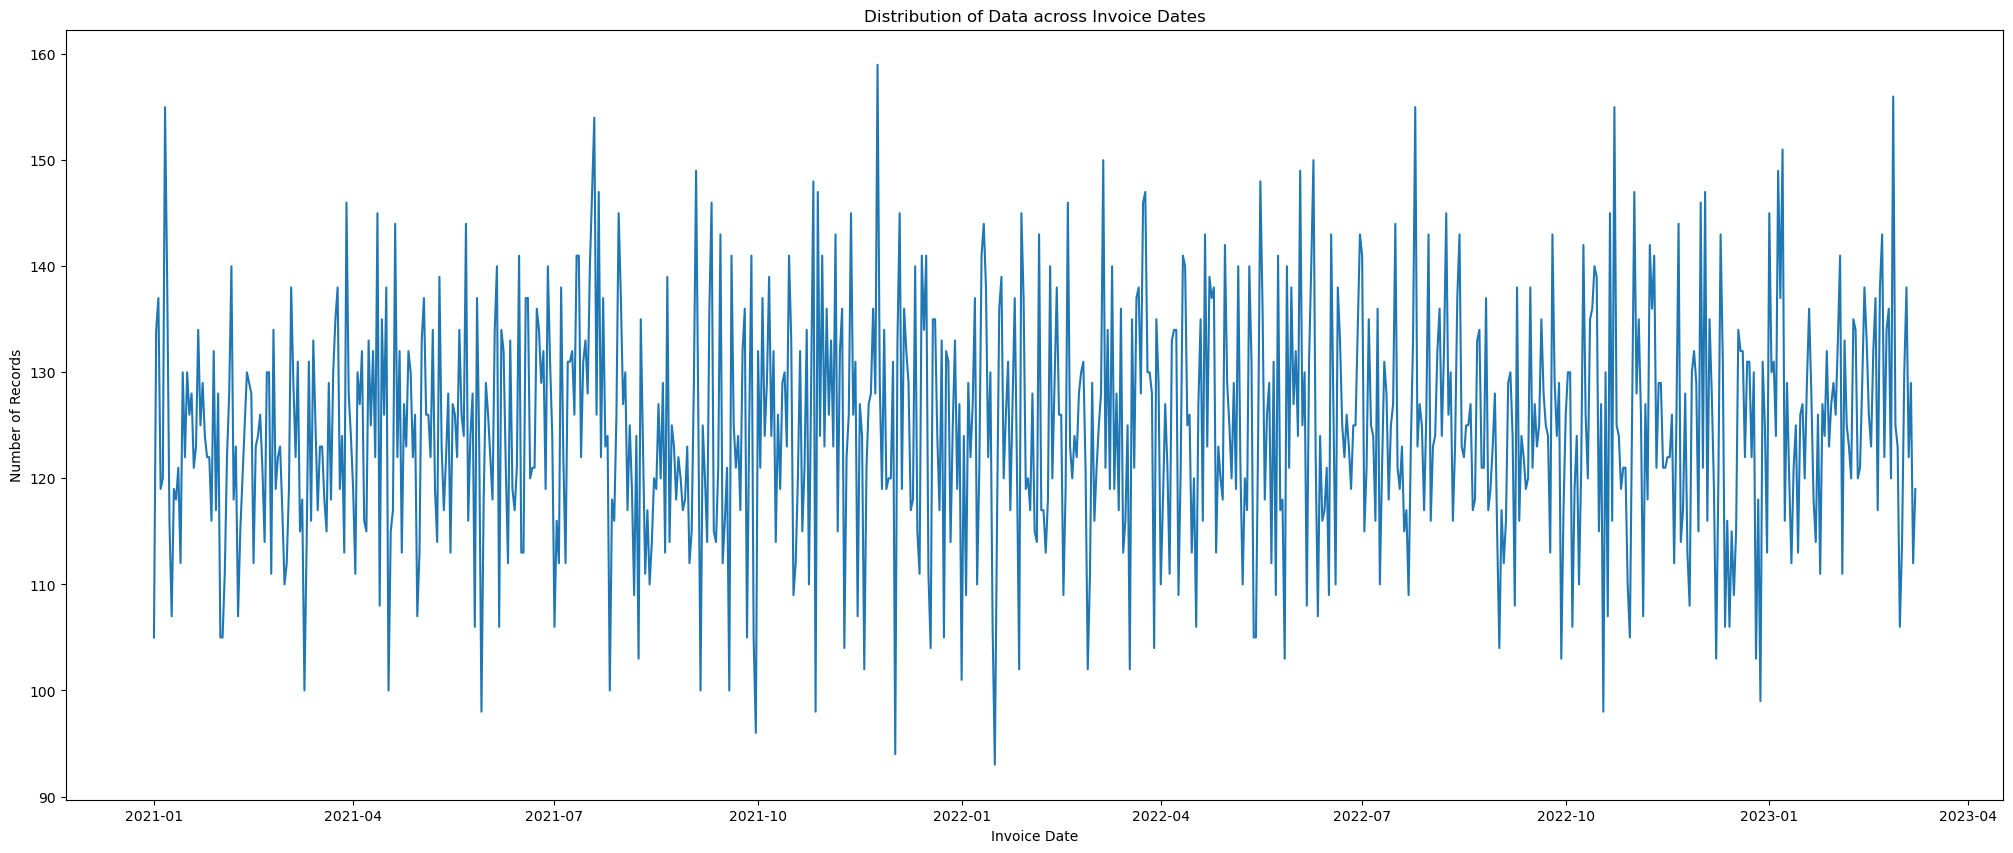

In [28]:
#How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

import matplotlib.pyplot as plt

df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

date_counts = df['invoice_date'].value_counts().sort_index()


plt.figure(figsize=(25, 10))
plt.plot(date_counts.index, date_counts.values)
plt.title('Distribution of Data across Invoice Dates')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Records')
plt.show()

# Hard

## 1

In [8]:
#Create a pivot table showing the breakdown of sales across these dimensions, 
#in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).'

age_range = pd.cut(df["age"],[0,10,19,29,39,49,59,69,79,89,99,109])
df.pivot_table("price", index="category", columns = age_range, aggfunc=["sum"])

sum                                                 \
age             (0, 10]   (10, 19]    (19, 29]    (29, 39]    (39, 49]   
category                                                                 
Books               0.0    3469.35    21619.05    22997.70    23361.30   
Clothing            0.0  518238.16  2818351.36  3074919.76  3066817.60   
Cosmetics           0.0   29681.80   165079.60   198054.86   181343.60   
Food & Beverage     0.0    3645.31    20428.38    23744.20    24460.71   
Shoes               0.0  274277.69  1630061.72  1912141.62  1889335.16   
Souvenir            0.0    3296.13    15295.92    17548.08    17759.22   
Technology          0.0  287700.00  1426950.00  1669500.00  1630650.00   
Toys                0.0   17203.20   102466.56   115297.28   106910.72   

                                                                          \
age                (49, 59]    (59, 69]    (69, 79]    (79, 89] (89, 99]   
category                                                                   
Books              20664.60    21513.00    15437.85     7575.00      0.0   
Clothing         2803647.44  2910776.00  2117064.40  1228827.60      0.0   
Cosmetics         160932.28   176627.04   114132.62    71236.32      0.0   
Food & Beverage    19999.52    22190.89    14968.26     8561.51      0.0   
Shoes            1591650.84  1618058.32  1210542.89   708200.60      0.0   
Souvenir           15084.78    15331.11    10592.19     6545.34      0.0   
Technology       1220100.00  1529850.00   977550.00   548100.00      0.0   
Toys               94115.84   100244.48    74475.52    43043.84      0.0   

                           
age             (99, 109]  
category                   
Books                 0.0  
Clothing              0.0  
Cosmetics             0.0  
Food & Beverage       0.0  
Shoes                 0.0  
Souvenir              0.0  
Technology            0.0  
Toys                  0.0